REPOSITORY

https://github.com/jayakrishnakatta/Deep-Learning

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Reproducibility
tf.random.set_seed(42)
np.random.seed(42)


In [11]:
# Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalise pixel values
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Create validation set
x_val = x_train[-6000:]
y_val = y_train[-6000:]

x_train = x_train[:-6000]
y_train = y_train[:-6000]

print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)


Train: (54000, 28, 28)
Val: (6000, 28, 28)
Test: (10000, 28, 28)


In [13]:
# Return correct activation layer
def activation_layer(name):
    if name == "leaky_relu":
        return layers.LeakyReLU(alpha=0.1)
    else:
        return layers.Activation(name)

def build_model(activation):
    return keras.Sequential([
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(256),
        activation_layer(activation),
        layers.Dense(128),
        activation_layer(activation),
        layers.Dense(10, activation="softmax")
    ])

In [14]:
activations = ["sigmoid", "tanh", "relu", "leaky_relu"]

histories = {}

for act in activations:
    print(f"\nTraining model with activation: {act}")
    model = build_model(act)
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size=128,
        verbose=2
    )

    histories[act] = history



Training model with activation: sigmoid
Epoch 1/10
422/422 - 7s - 16ms/step - accuracy: 0.7539 - loss: 0.7618 - val_accuracy: 0.8295 - val_loss: 0.4595
Epoch 2/10
422/422 - 4s - 9ms/step - accuracy: 0.8467 - loss: 0.4295 - val_accuracy: 0.8540 - val_loss: 0.3970
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.8620 - loss: 0.3839 - val_accuracy: 0.8618 - val_loss: 0.3700
Epoch 4/10
422/422 - 3s - 7ms/step - accuracy: 0.8708 - loss: 0.3575 - val_accuracy: 0.8663 - val_loss: 0.3536
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.8772 - loss: 0.3384 - val_accuracy: 0.8715 - val_loss: 0.3425
Epoch 6/10
422/422 - 4s - 9ms/step - accuracy: 0.8832 - loss: 0.3230 - val_accuracy: 0.8752 - val_loss: 0.3343
Epoch 7/10
422/422 - 3s - 7ms/step - accuracy: 0.8875 - loss: 0.3099 - val_accuracy: 0.8778 - val_loss: 0.3279
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.8914 - loss: 0.2983 - val_accuracy: 0.8792 - val_loss: 0.3228
Epoch 9/10
422/422 - 4s - 9ms/step - accuracy: 0.8946 - loss: 0.2878 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
422/422 - 6s - 13ms/step - accuracy: 0.8113 - loss: 0.5314 - val_accuracy: 0.8560 - val_loss: 0.4027
Epoch 2/10
422/422 - 3s - 7ms/step - accuracy: 0.8641 - loss: 0.3760 - val_accuracy: 0.8693 - val_loss: 0.3651
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.8776 - loss: 0.3340 - val_accuracy: 0.8762 - val_loss: 0.3463
Epoch 4/10
422/422 - 3s - 7ms/step - accuracy: 0.8865 - loss: 0.3084 - val_accuracy: 0.8758 - val_loss: 0.3394
Epoch 5/10
422/422 - 5s - 11ms/step - accuracy: 0.8938 - loss: 0.2888 - val_accuracy: 0.8757 - val_loss: 0.3444
Epoch 6/10
422/422 - 3s - 7ms/step - accuracy: 0.8988 - loss: 0.2729 - val_accuracy: 0.8772 - val_loss: 0.3415
Epoch 7/10
422/422 - 5s - 12ms/step - accuracy: 0.9031 - loss: 0.2605 - val_accuracy: 0.8748 - val_loss: 0.3524
Epoch 8/10
422/422 - 4s - 9ms/step - accuracy: 0.9080 - loss: 0.2470 - val_accuracy: 0.8797 - val_loss: 0.3446
Epoch 9/10
422/422 - 4s - 10ms/step - accuracy: 0.9122 - loss: 0.2361 - val_accuracy: 0.8810 - val_loss: 0.34

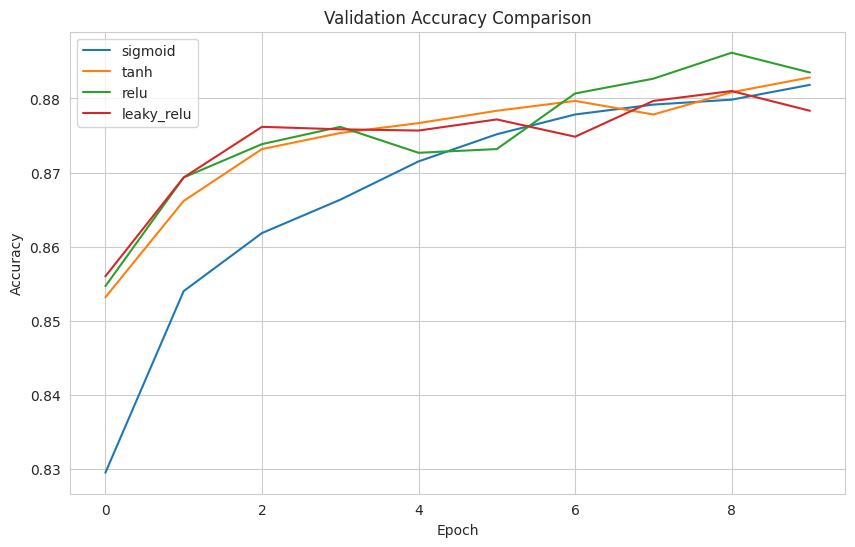

In [15]:
plt.figure(figsize=(10,6))
for act in activations:
    plt.plot(histories[act].history["val_accuracy"], label=act)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


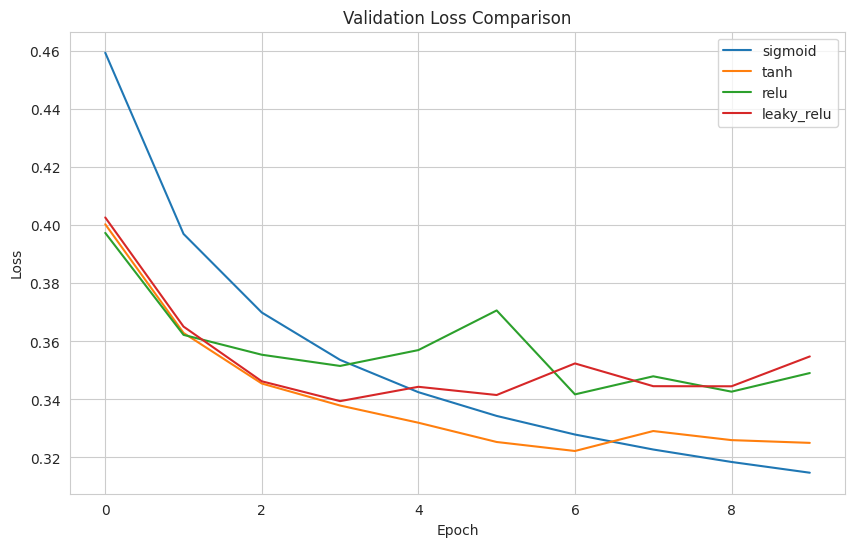

In [16]:
plt.figure(figsize=(10,6))
for act in activations:
    plt.plot(histories[act].history["val_loss"], label=act)

plt.title("Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [17]:
activation_outputs = {}

for act in activations:
    model = build_model(act)
    # Explicitly build the model before accessing model.input
    model.build(input_shape=(None, 28, 28)) # (batch_size, height, width)
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy"
    )

    # Train briefly to get meaningful activations
    model.fit(x_train, y_train, epochs=2, batch_size=128, verbose=0)

    # Create submodel to extract first Dense layer output
    activation_model = keras.Model(
        inputs=model.layers[0].input,   # Use the input of the first layer (Flatten)
        outputs=model.layers[1].output   # first Dense layer
    )

    sample = x_train[:1000]
    acts = activation_model.predict(sample).flatten()
    activation_outputs[act] = acts

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


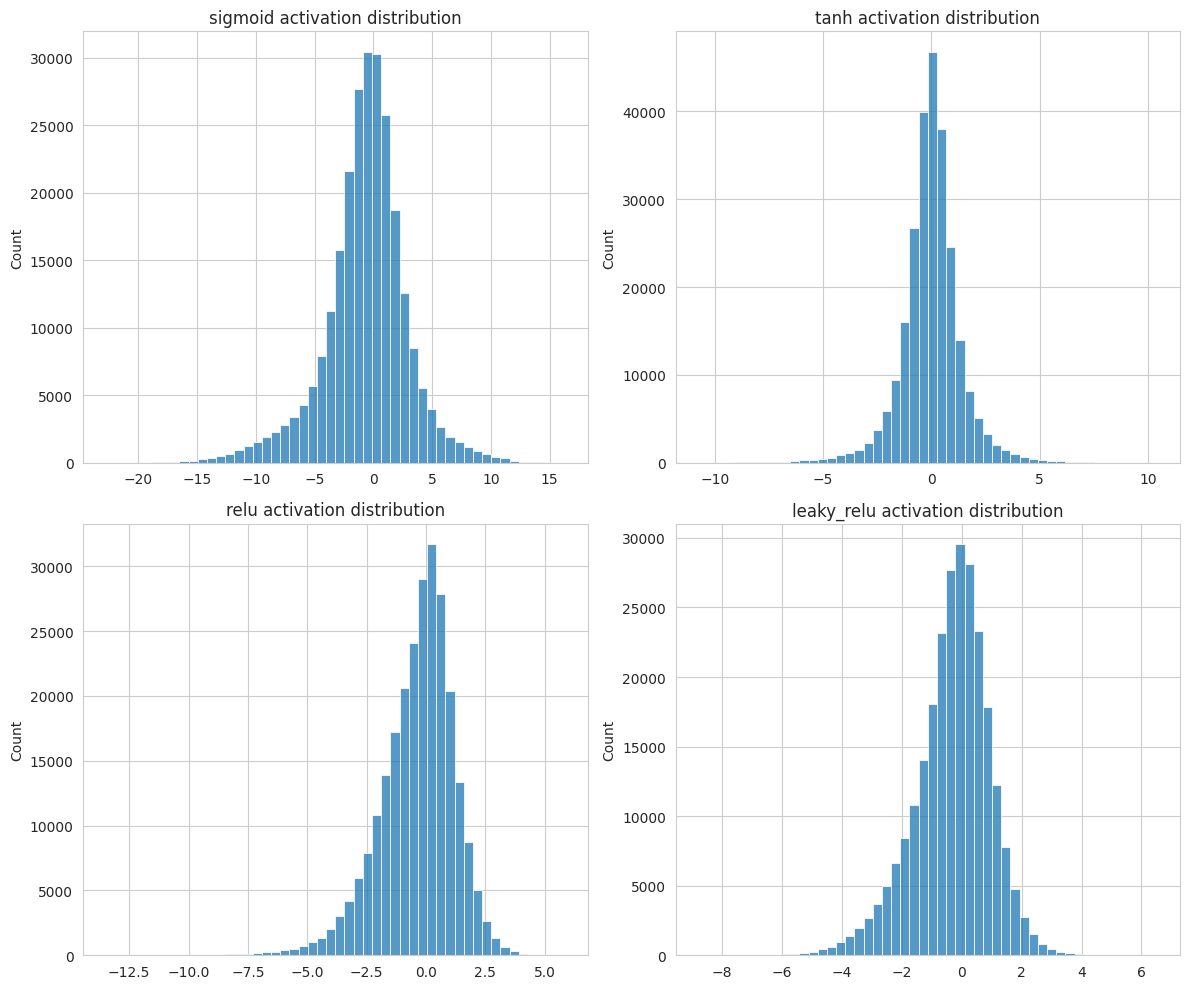

In [18]:
plt.figure(figsize=(12,10))

for i, act in enumerate(activations, 1):
    plt.subplot(2,2,i)
    sns.histplot(activation_outputs[act], bins=50, kde=False)
    plt.title(f"{act} activation distribution")

plt.tight_layout()
plt.show()


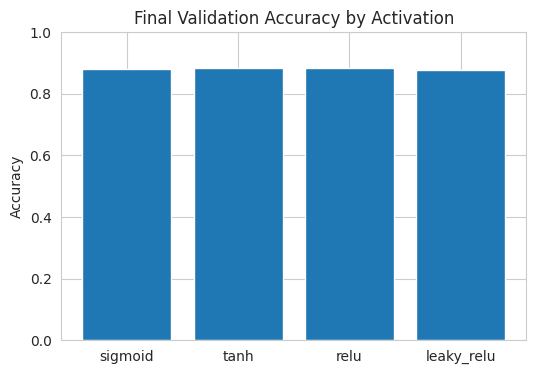

{'sigmoid': 0.8818333148956299,
 'tanh': 0.8828333616256714,
 'relu': 0.8834999799728394,
 'leaky_relu': 0.878333330154419}

In [19]:
final_acc = {act: histories[act].history["val_accuracy"][-1] for act in activations}

plt.figure(figsize=(6,4))
plt.bar(final_acc.keys(), final_acc.values())
plt.title("Final Validation Accuracy by Activation")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

final_acc  # shows exact values
